<a href="https://colab.research.google.com/github/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/blob/main/Taxi_fare_predictor_with_shap_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install category_encoders
!pip install -U scikit-learn
!pip install shap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import shap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [37]:
trainDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-train.csv'
train_data = pd.read_csv(trainDataUrl)
train_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5
3,CMT,1,1,181,0.6,CSH,4.5
4,CMT,1,1,661,1.1,CRD,8.5


In [38]:
testDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-test.csv'
test_data = pd.read_csv(testDataUrl)
test_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,VTS,1,1,1140,3.75,CRD,15.5
1,VTS,1,1,480,2.72,CRD,10.0
2,VTS,1,1,1680,7.80,CSH,26.5
3,VTS,1,1,600,4.73,CSH,14.5
4,VTS,1,1,600,2.18,CRD,9.5


In [39]:
train_data.isna().sum()

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

In [40]:
train_data.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [41]:
OHE = ce.OneHotEncoder(cols=['vendor_id',
                             'payment_type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)
test_data = OHE.fit_transform(test_data)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [42]:
train_data.head()

,vendor_id_CMT,vendor_id_VTS,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type_CRD,payment_type_CSH,payment_type_NOC,payment_type_DIS,payment_type_UNK,fare_amount
0,1,0,1,1,1271,3.8,1,0,0,0,0,17.5
1,1,0,1,1,474,1.5,1,0,0,0,0,8.0
2,1,0,1,1,637,1.4,1,0,0,0,0,8.5
3,1,0,1,1,181,0.6,0,1,0,0,0,4.5
4,1,0,1,1,661,1.1,1,0,0,0,0,8.5


In [43]:
train_X = train_data.drop(columns=['fare_amount'])
train_Y = train_data['fare_amount']
test_X = test_data.drop(columns=['fare_amount'])
test_Y = test_data['fare_amount']

In [44]:
model_LR = LinearRegression()

# fit the model with the training data
model_LR.fit(train_X, train_Y)


LinearRegression()

In [45]:
predict_train = model_LR.predict(train_X)

In [46]:
print('Mean absolute error on train data: ', mean_absolute_error(train_Y, predict_train))

Mean absolute error on train data:  0.8483768403392281


In [47]:
print('Mean absolute error percentage on train data: ', mean_absolute_percentage_error(train_Y, predict_train))

Mean absolute error percentage on train data:  0.07358908309404945


In [48]:
predict_test = model_LR.predict(test_X)

In [49]:
print('Mean absolute error on test data: ', mean_absolute_error(test_Y, predict_test))

Mean absolute error on test data:  0.8732104119874754


In [50]:
print('Mean absolute error percentage on test data: ', mean_absolute_percentage_error(test_Y, predict_test))

Mean absolute error percentage on test data:  0.07721807521611289


In [51]:
print("Predicted Fair: ", predict_test[15], "Expected: ", test_Y.iloc[15])

Predicted Fair:  8.986289723487486 Expected:  8.5


In [52]:
print("Model coefficients:\n")
for i in range(test_X.shape[1]):
    print(train_X.columns[i], "=", model_LR.coef_[i].round(4))

Model coefficients:

vendor_id_CMT = -0.0023
vendor_id_VTS = 0.0023
rate_code = 9.2646
passenger_count = -0.0072
trip_time_in_secs = 0.0065
trip_distance = 1.5728
payment_type_CRD = 1.5885
payment_type_CSH = 1.3651
payment_type_NOC = -3.2031
payment_type_DIS = -2.0214
payment_type_UNK = 2.2709


In [53]:
X100 = shap.utils.sample(test_X, 100)

In [54]:
explainer = shap.Explainer(model_LR.predict, X100)
shap_values = explainer(test_X.head(100))

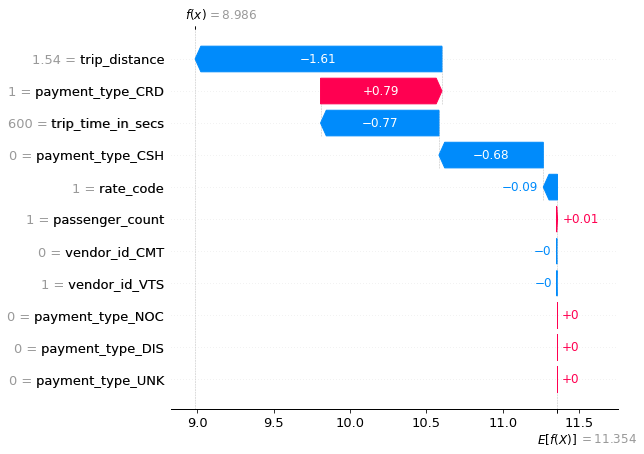

In [56]:
shap.plots.waterfall(shap_values[15], max_display=14)